## Created by - Prasoon

### IRIS FLOWER CLASSIFICATION
##### Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [24]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Loading the Dataset
iris = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
iris.head()     # Viewing first 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# Getting the size of dataset
iris.shape

(150, 6)

##### The dataset contains 150 rows and 6 columns 

In [27]:
# Getting information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### There are no null values in the dataset.

In [28]:
# Checking for duplicate values
iris.duplicated().value_counts()

False    150
Name: count, dtype: int64

##### There are no duplicate values

In [29]:
# dropping the id column 
iris.drop(columns=["Id"], inplace=True)
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Knowing data through visualization


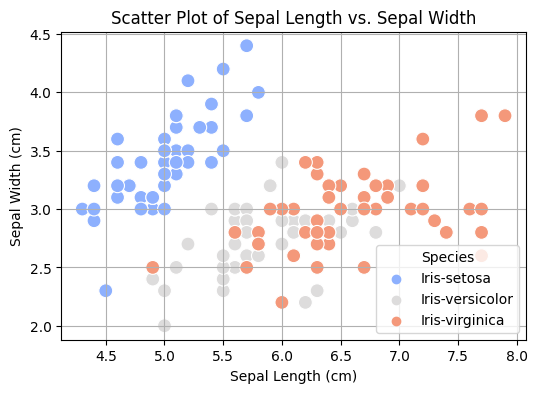

In [30]:
#Create a scatter plot between Sepal Length and Sepal Width 
plt.figure(figsize=(6, 4))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris, palette='coolwarm', marker='o', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.legend(title='Species')
plt.grid(True)

# Show the plot
plt.show()


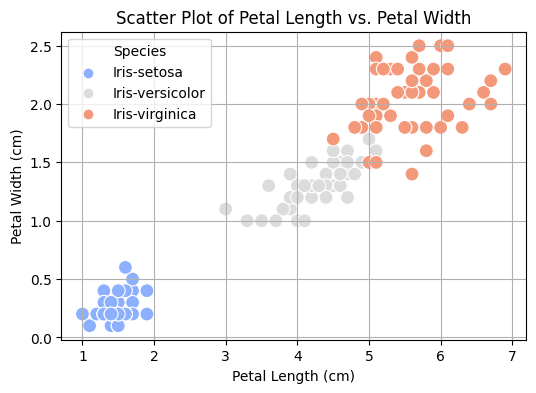

In [31]:
#Create a scatter plot between Petal Length and Petal Width 
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris, palette='coolwarm', marker='o', s=100)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.legend(title='Species')
plt.grid(True)

# Show the plot
plt.show()

##### From the above two scatter plots it is clear that PetalLengthCm and PetalWidthCm can yield better results.

#### Correlation and Correlation Matrix
##### Correlation is a statistical measure that quantifies the extent to which two variables change together. It describes the statistical relationship between two or more random variables. In simpler terms, correlation indicates whether there is a tendency for one variable to increase or decrease when the other variable does the same.

##### A correlation matrix is a table that displays the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. It is used to summarize data, as an input for more advanced analyses, and as a diagnostic tool. Correlation coefficients quantify the association between two variables. The most common type of correlation coefficient is Pearson's correlation coefficient, which measures the linear relationship between variables.

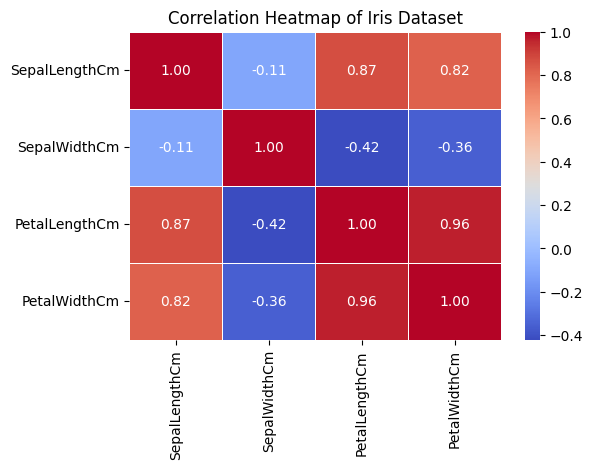

In [32]:
# Removing the non_numerical column
iris_c = iris.drop(columns=['Species'])
# Calculate the correlation matrix
correlation_matrix = iris_c.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

##### We see that (PetalWidthCm and SepalLengthCm), (PetalLengthCm and SepalLengthCm) and (PetalLengthCm and PetalWidthCm) has high correlation of 0.82, 0.87 and 0.96 respectively.

### Classification begins 
##### Using Support Vector Machines (SVM) for classification

In [33]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

#### Classification using SepalLengthCm and SepalWidthCm as features

In [34]:
# Select SepalLengthCm and SepalWidthCm as features
X = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris['Species']

# Encode the target variable 'Species' to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report with precision, recall, and F1-score
target_names = le.classes_
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)


Accuracy: 0.80
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.70      0.54      0.61        13
 Iris-virginica       0.62      0.77      0.69        13

       accuracy                           0.80        45
      macro avg       0.78      0.77      0.77        45
   weighted avg       0.81      0.80      0.80        45



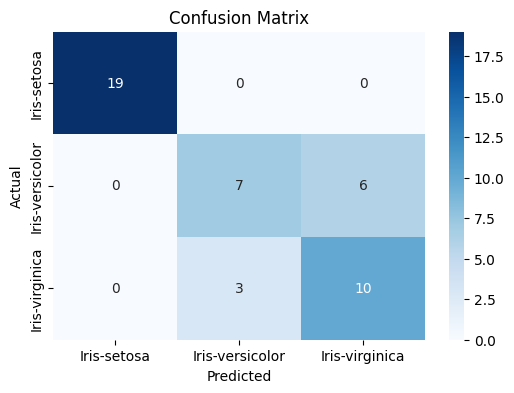

In [35]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, index=target_names, columns=target_names)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Classification using PetalLengthCm and PetalWidthCm as features

In [36]:
# Select SepalLengthCm and SepalWidthCm as features
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Encode the target variable 'Species' to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report with precision, recall, and F1-score
target_names = le.classes_
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



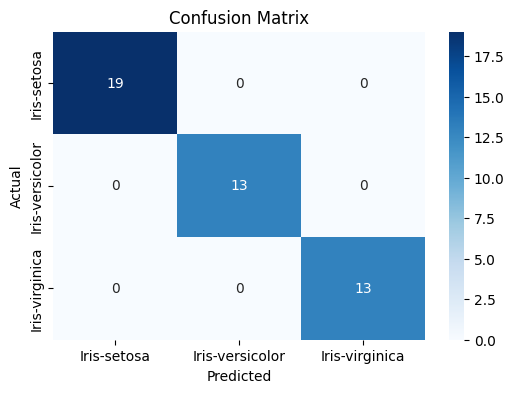

In [37]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion, index=target_names, columns=target_names)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()